#**Gráficos descriptivos básicos con Seaborn Python**

En esta lección, se hará una revisión de los gráficos más usuales para labores descriptivas de variables con Seaborn. El tipo de gráfico dependerá del tipo de variable e incluso del número de variables que deseamos describir. Inicialmente, describiremos variables cuantitativas y variables cualitativas, haremos análisis univariado o bivaluado. Se trabajará mayormente con el conjunto de datos iris.

In [330]:
# matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

x = np.random.normal(size=100) # una distribución normal aleatoria de numpy

sns.set_theme()

titanic = sns.load_dataset("titanic") ## conjunto de datos del titanic en kaggle
tips = sns.load_dataset("tips")  ## conjunt de datos de propinas
iris = sns.load_dataset("iris")  ## conjunto de datos de flores
penguins = sns.load_dataset("penguins") ## conjunto de datos de pinguinos

## Análisis univariados

###Variables cuantitativas

Cuando describimos variables cuantitativas lo principal es conocer su forma, sobre que valores se hayan los datos y como son de dispersos y para ello el gráfico estrella es el **histograma** (*histplot*):

<Axes: xlabel='sepal_width', ylabel='Count'>

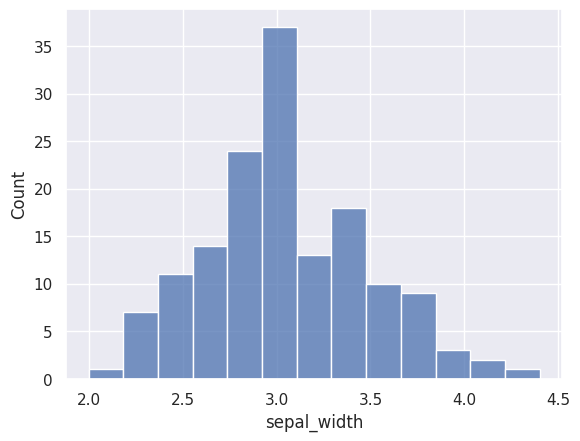

In [331]:
sns.histplot(data=iris, x="sepal_width")

*histplot* muestra un histograma de recuento muy estándar.

Si queremos ver la distribución como una línea continua disponemos de los gráficos de densidad:

<Axes: xlabel='sepal_width', ylabel='Density'>

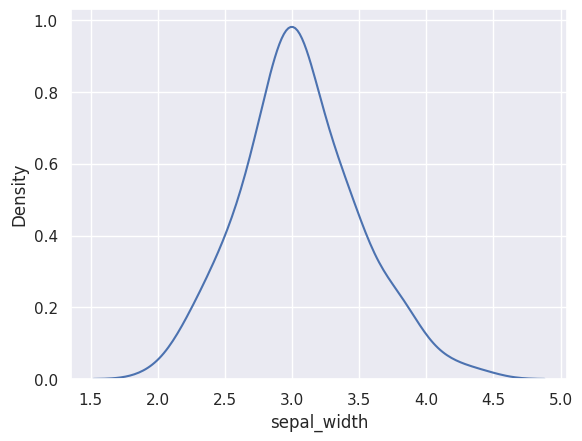

In [332]:
#sns.kdeplot(iris['sepal_width'], bw=0.5)
sns.kdeplot(iris["sepal_width"])

O use *kind="kde"* en *displot*:

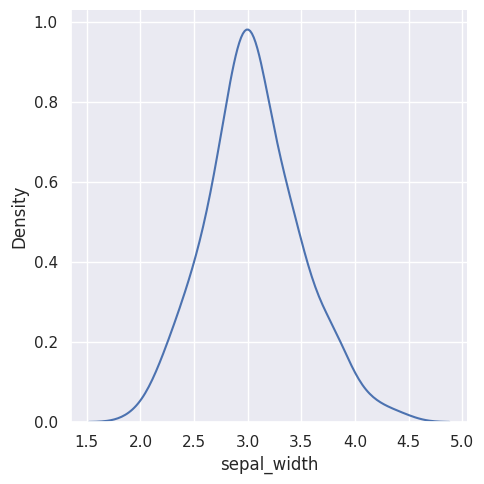

In [333]:
sns.displot(iris["sepal_width"], kind="kde")

Una ambos gráficos con *histplot*, el cual muestra un histograma (usando normalización de densidad) y una estimación de densidad del núcleo superpuesta:

<Axes: xlabel='sepal_width', ylabel='Count'>

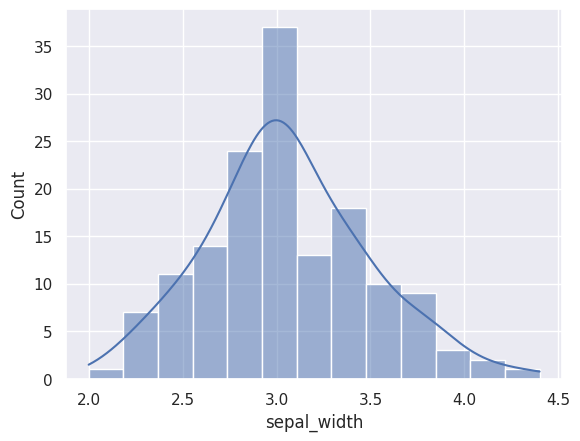

In [334]:
sns.histplot(iris["sepal_width"], kde=True)

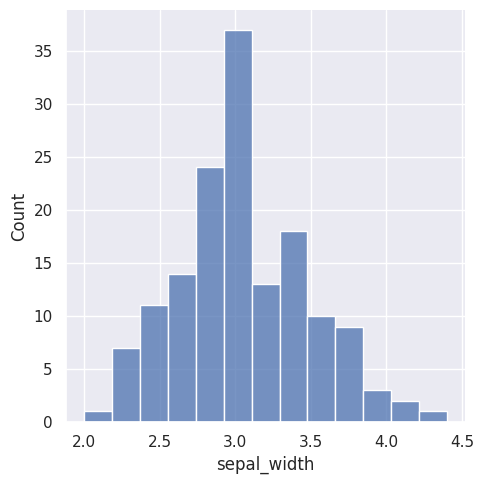

In [335]:
sns.displot(iris["sepal_width"])

##Incorporación de alfombra

*distplot* e *histplot* se diferencian en que este último no tiene un diagrama de alfombra incorporado. Se debe llamar a *rugplot* directamente:

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

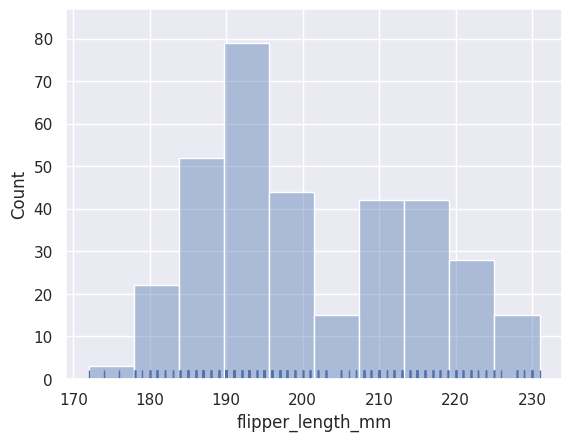

In [336]:
sns.histplot(penguins, x="flipper_length_mm", alpha=.4)
sns.rugplot(penguins, x="flipper_length_mm")

Con *displot* siempre se puede agregar la alfombra:

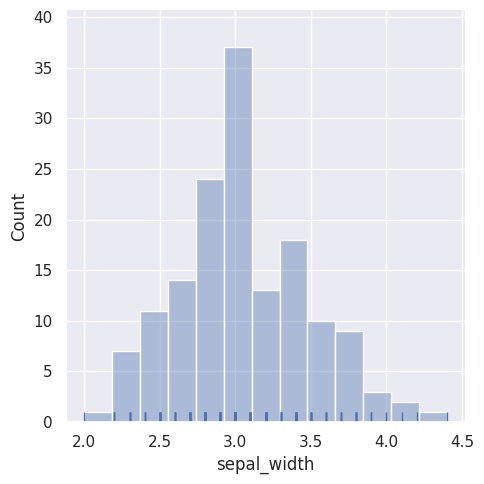

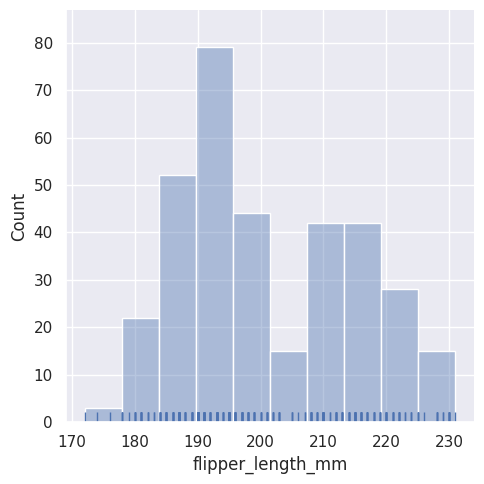

In [337]:
sns.displot(iris["sepal_width"], alpha=.4, rug=True)
sns.displot(penguins, x="flipper_length_mm", alpha=.4, rug=True)

Entre otra de las monerías de displot es que se puede controlar el número de barras (bins)

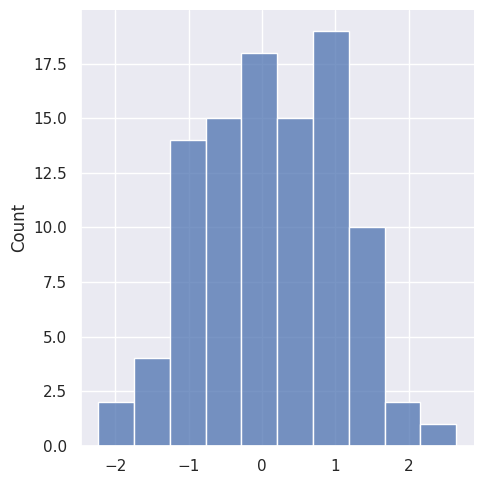

In [338]:
sns.displot(x, kde=False, rug=False, bins=10)

El otro gráfico que destacaría sería el gráfico de cajas y bigotes que llamaremos boxplot y que es así de sencillo con seaborn:

<Axes: xlabel='sepal_length'>

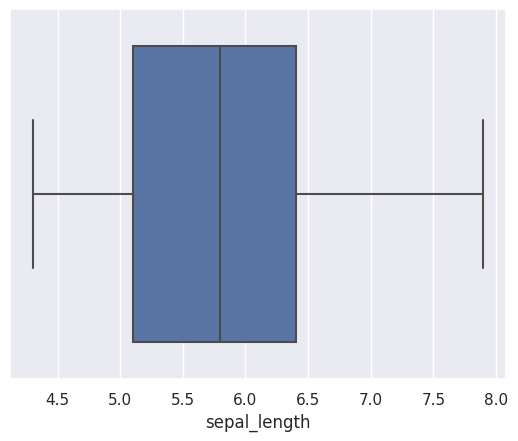

In [339]:
sns.boxplot(x="sepal_length", data=iris)

Este gráfico nos dice mucho de una variable, esa caja nos indica donde están el 75% que es lo que definimos como rango intercuartílico, hay una línea que nos indica la mediana y esos «bigotes» nos dan una medida de lo dispersos que se encuentran los datos, e incluso si hay observaciones que están 1,5 veces por encima del rango intercuartílico las da más importancia marcándolas con puntos y que se pueden denominar datos extremos.

###Variables cualitativas


Para describir variables cualitativas el gráfico más habitual es el gráfico de barras donde contamos observaciones, en seaborn tenemos countplot:

<Axes: xlabel='species', ylabel='count'>

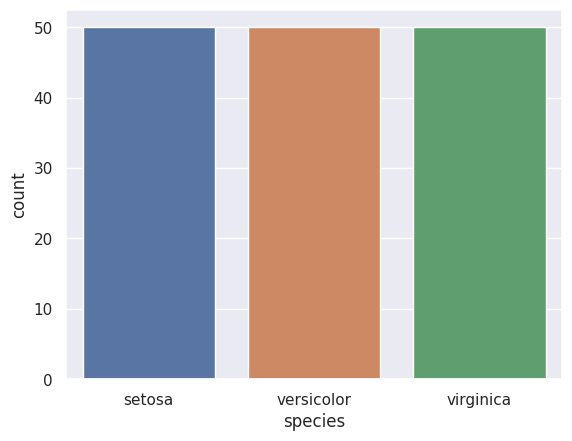

In [340]:
sns.countplot(x='species', data=iris)

In [341]:
#sns.countplot(x='sex', hue='embarked', data=titanic, palette='Greens_d')

Sin embargo, se sugiere que este tipo de gráficos se haga después de realizar una tabla de agregación, en este caso con pandas, los tiempos de ejecución siempre son menores:

<Axes: xlabel='species', ylabel='sepal_length'>

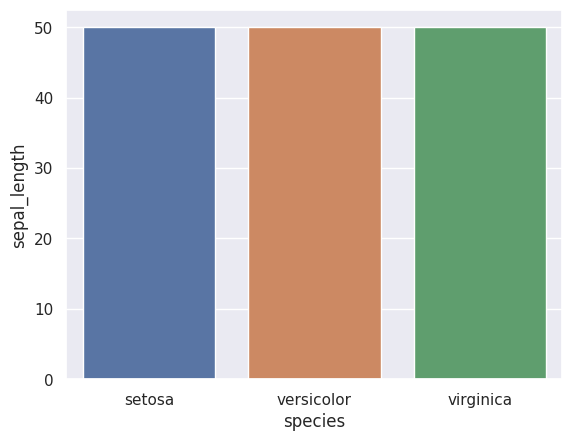

In [342]:
agr = iris[['sepal_length','species']].groupby('species').count()
agr = agr.reset_index()
sns.barplot(x='species', y='sepal_length', data=agr)

Con seaborn no se pueden hacer gráficos de tarta, así que no describiremos variables cualitativas de ese modo.

##Análisis bivariable

Disponemos de los gráficos básicos para describir una variable, pero habitualmente necesitaremos describir una variable en función de otra y así tenemos gráficos bivariables con las posibles combinaciones entre los tipos de las variables a describir.

###Dos variables cuantitativas

En este caso tenemos el el habitual gráfico de puntos

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

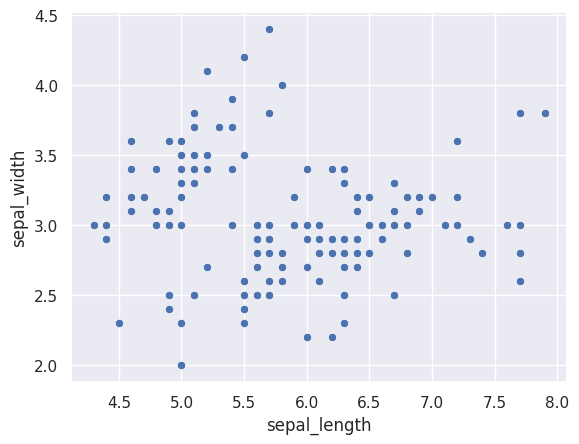

In [343]:
sns.scatterplot(data=iris, x="sepal_length", y="sepal_width")

Al que podemos añadir una variable cualitativa para identificar segmentos:

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

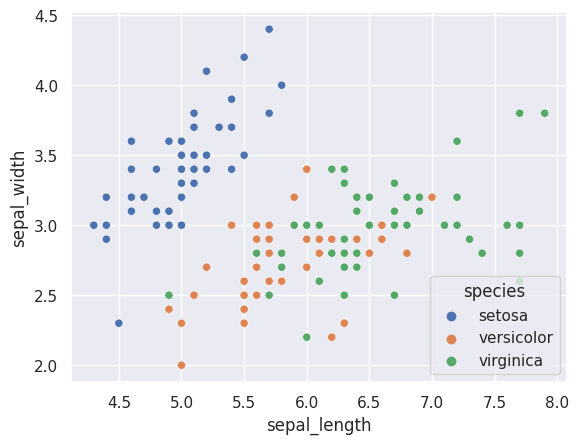

In [344]:
sns.scatterplot(data=iris, x="sepal_length", y="sepal_width", hue="species")

Se aprecia como hue sirve para generar ese segmento. En otros gráficos que hemos trabajado, como los gráficos de densidades, en vez de hue directamente se trabaja con data frames separados, como en el ejemplo siguiente, que compara los gráficos de densidades de una variable en función de otra cuantitativa:

<function seaborn.axisgrid.jointplot(data=None, *, x=None, y=None, hue=None, kind='scatter', height=6, ratio=5, space=0.2, dropna=False, xlim=None, ylim=None, color=None, palette=None, hue_order=None, hue_norm=None, marginal_ticks=False, joint_kws=None, marginal_kws=None, **kwargs)>

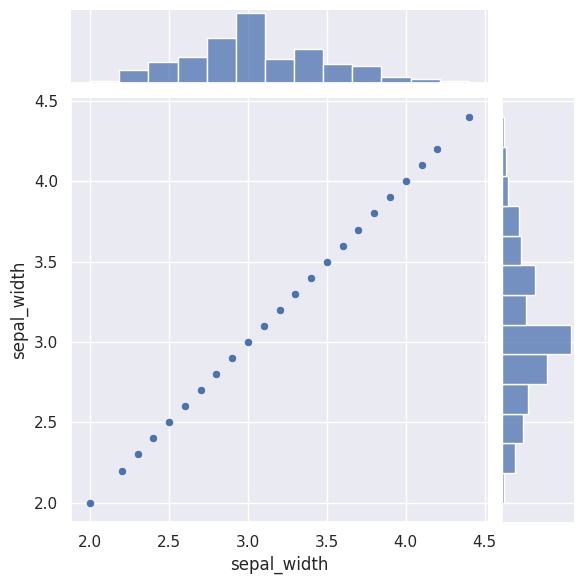

In [345]:
sns.jointplot( data=iris, x='sepal_width', y='sepal_width')
sns.jointplot

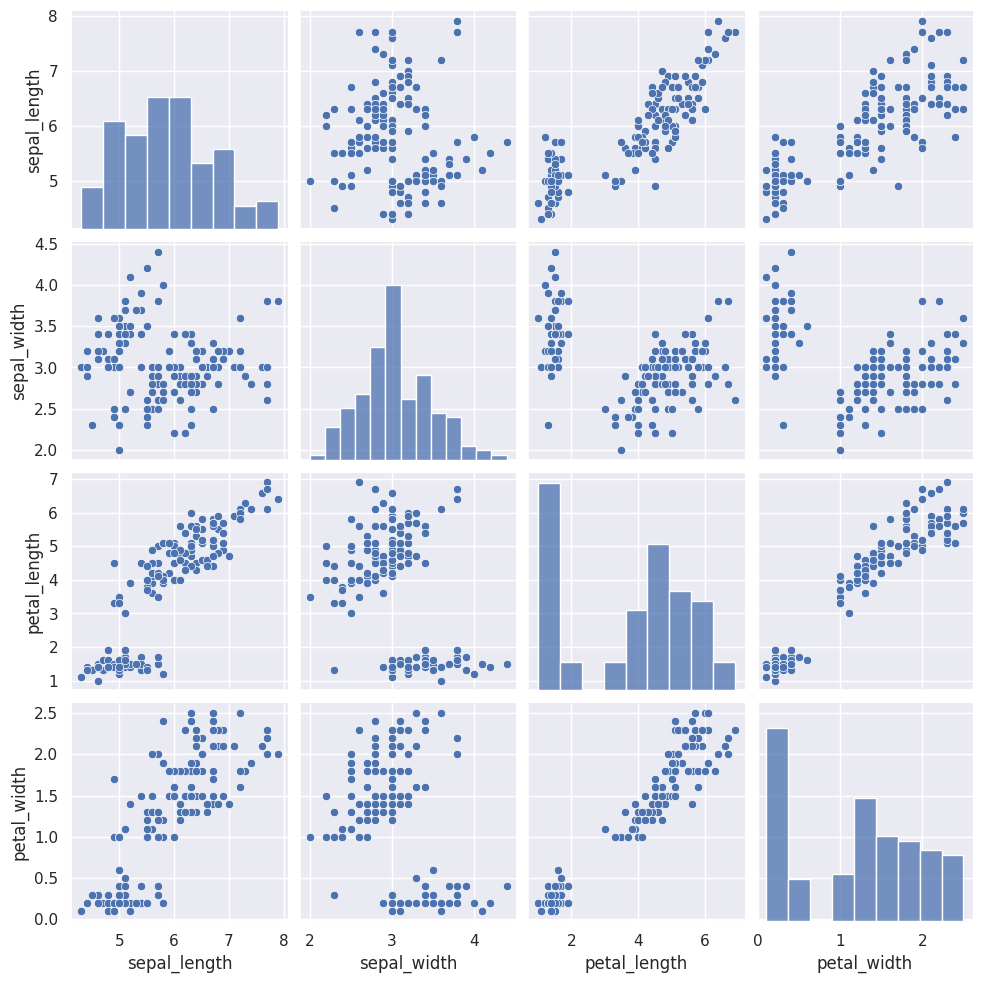

In [346]:
sns.pairplot(iris)

In [347]:
type(iris)

pandas.core.frame.DataFrame

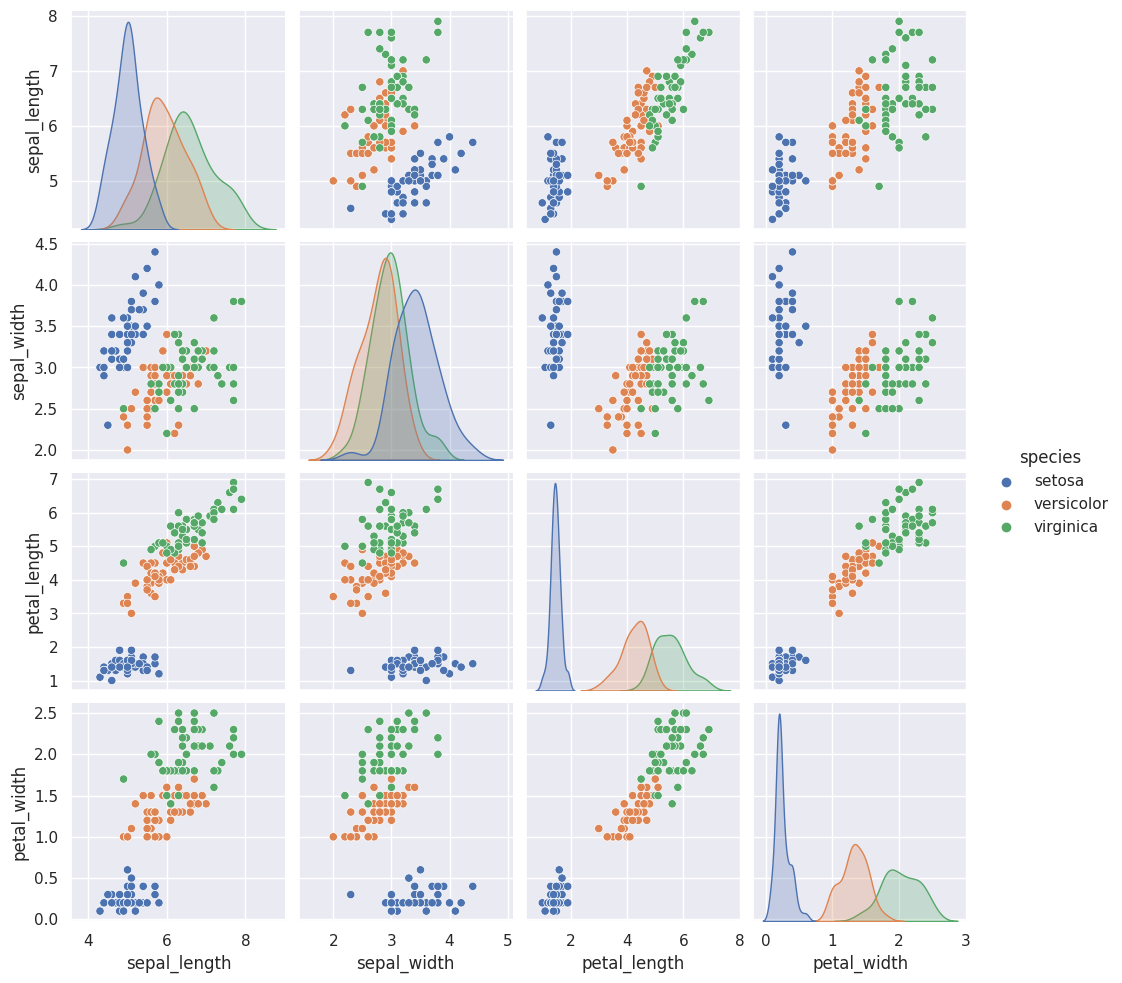

In [348]:
sns.pairplot(iris, hue="species")

<Axes: xlabel='sepal_length', ylabel='Density'>

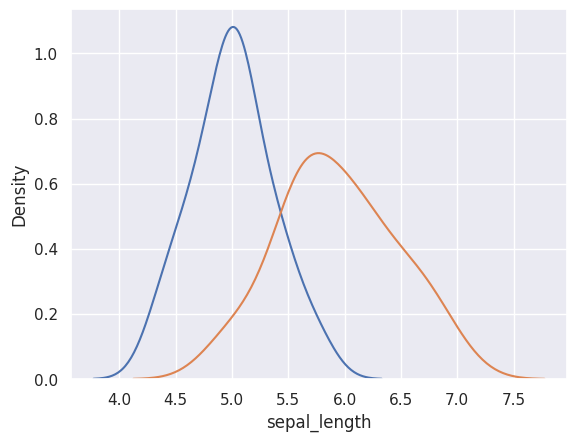

In [349]:
df1 = iris[iris['species']=="setosa"]
df2 = iris[iris['species']=="versicolor"]

sns.kdeplot(df1['sepal_length'], bw_method=0.5)
sns.kdeplot(df2['sepal_length'], bw_method=0.5)

También se pueden realizar gráficos de densidades bivariables:

<ipython-input-350-3ad1c658e368>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=iris, x='sepal_length', y='sepal_width', shade=True)


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

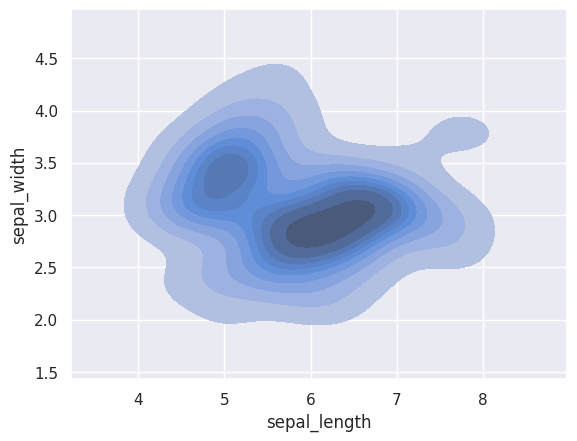

In [350]:
sns.kdeplot(data=iris, x='sepal_length', y='sepal_width', shade=True)


<Axes: xlabel='size', ylabel='tip'>

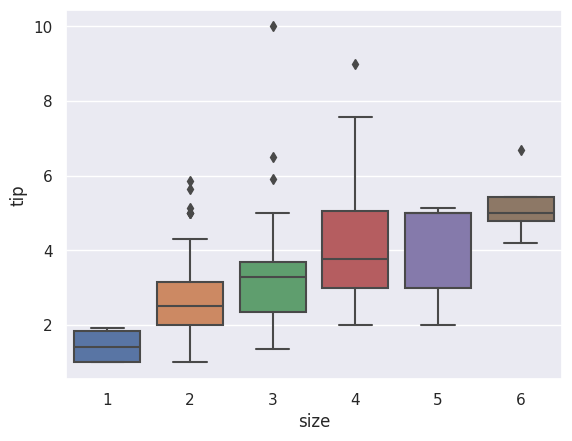

In [351]:
sns.boxplot(x="size", y="tip", data=tips.sort_values('size'))

### Dos variables cualitativas

En este caso es necesario emplear otras opciones de los diagramas de barras como añadir una nueva barra.

<Axes: xlabel='species', ylabel='sepal_length'>

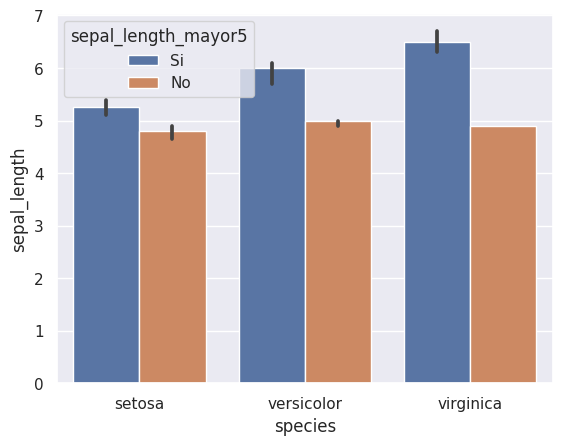

In [352]:
iris['sepal_length_mayor5'] = np.where(iris['sepal_length'] > 5,"Si", "No")

sns.barplot(x='species', y='sepal_length', hue = 'sepal_length_mayor5', data=iris, estimator= np.median)

Para columnas agrupadas no se recomienda el uso de seaborn, se complica el código. Pero se puede realizar con Pandas:

<Axes: xlabel='species'>

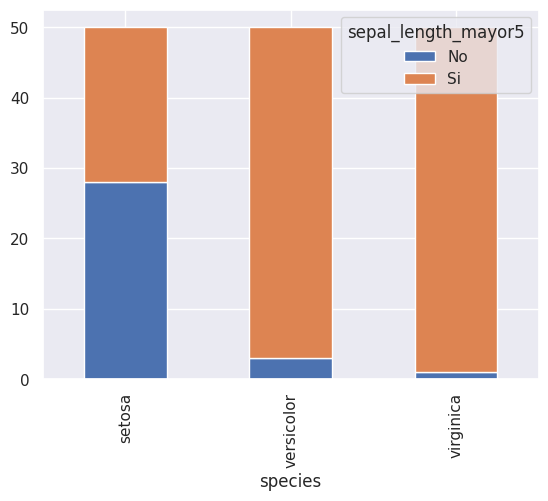

In [353]:
agr = iris.groupby(['species', 'sepal_length_mayor5']).size().reset_index().pivot(columns='sepal_length_mayor5', index='species', values=0)
agr.plot(kind='bar', stacked=True)

### Una variable cuantitativa contra a una variable cualitativa

Por último una mezcla entre ambos tipos de variables, con anterioridad se vio algún ejemplo, pero son imprescindibles los gráficos de densidades frente a variables cualitativas:

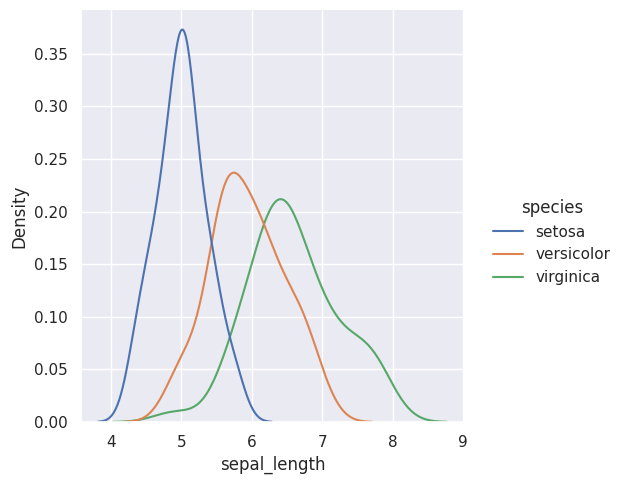

In [354]:
sns.displot(data=iris, x="sepal_length", hue="species", kind="kde")

<Axes: xlabel='species', ylabel='sepal_length'>

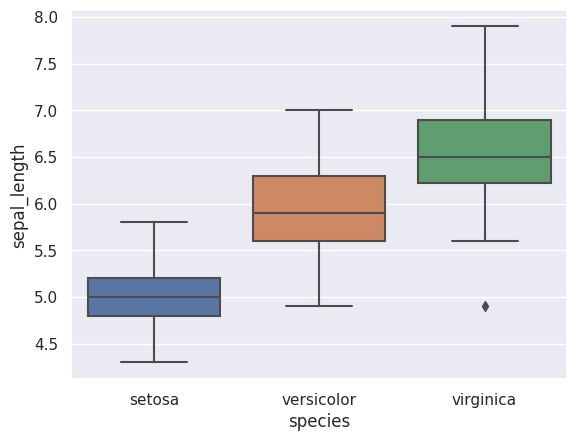

In [355]:
sns.boxplot(y="sepal_length", x='species', data=iris)

In [356]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='day', ylabel='total_bill'>

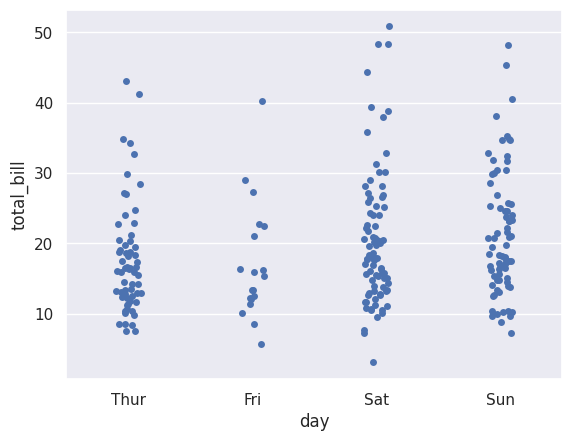

In [357]:
sns.stripplot(x="day", y="total_bill", data=tips)

Con segmentación por tiempo (time).

<Axes: xlabel='day', ylabel='total_bill'>

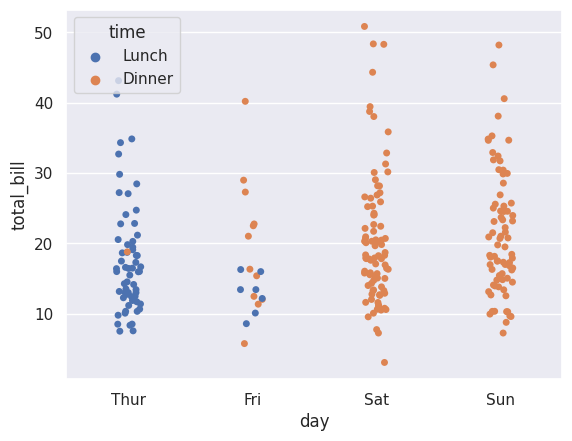

In [358]:
sns.stripplot(x="day", y="total_bill", data=tips, hue='time')

In [359]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='sex', ylabel='survived'>

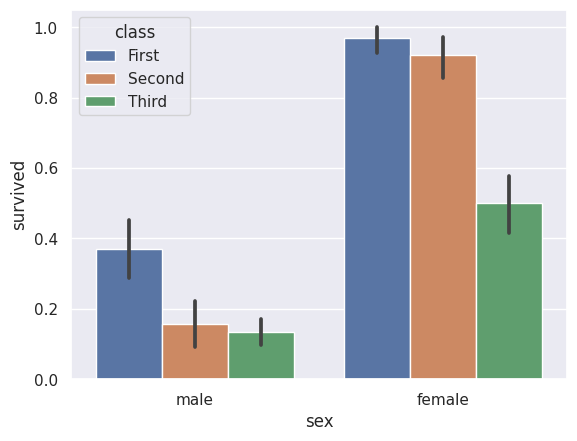

In [360]:
sns.barplot(x='sex', y='survived', data=titanic, hue='class')

<Axes: xlabel='sex', ylabel='survived'>

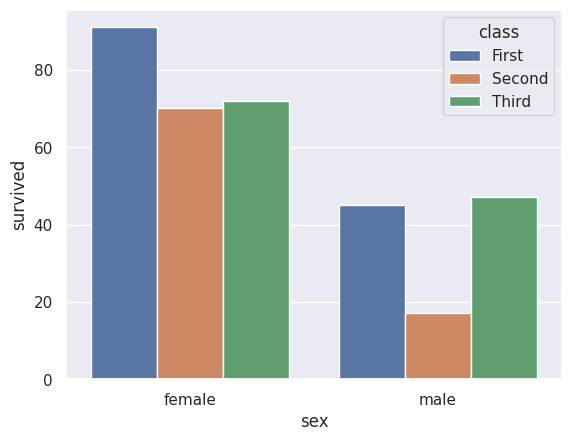

In [361]:
titanic_grpby = titanic.groupby( ['sex', 'class'])
titanic_data_for_graph = titanic_grpby['survived'].aggregate(sum).reset_index()

sns.barplot(x='sex', y='survived', hue= 'class', data=titanic_data_for_graph)